In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [5]:
dataset = pd.read_csv("student_habits_performance.csv")
dataset.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [7]:
dataset.shape

(1000, 16)

In [8]:
dataset.isnull().sum()

student_id                        0
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [9]:
dataset=dataset.dropna()

In [10]:
dataset.isnull().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

In [11]:
dataset.duplicated().sum()

np.int64(0)

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
dataset.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,20.475248,3.538724,2.504620,1.830363,83.880308,6.474037,3.051705,5.466447,69.558196
std,2.302721,1.469730,1.164802,1.071251,9.453622,1.218943,2.035632,2.857525,16.929436
min,17.000000,0.000000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.000000,2.500000,1.700000,1.000000,77.500000,5.600000,1.000000,3.000000,58.400000
50%,20.000000,3.500000,2.500000,1.800000,84.200000,6.500000,3.000000,5.000000,70.400000
75%,22.000000,4.500000,3.300000,2.600000,90.700000,7.300000,5.000000,8.000000,81.300000
max,24.000000,8.300000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


In [14]:
dataset.describe(include="object").columns

Index(['student_id', 'gender', 'part_time_job', 'diet_quality',
       'parental_education_level', 'internet_quality',
       'extracurricular_participation'],
      dtype='object')

In [15]:
categorical_cols = [ 'gender', 'part_time_job', 'diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation']

for col in categorical_cols:
    print(f"Value count for{col}: \n {dataset[col].value_counts()}")

Value count forgender: 
 gender
Male      440
Female    433
Other      36
Name: count, dtype: int64
Value count forpart_time_job: 
 part_time_job
No     713
Yes    196
Name: count, dtype: int64
Value count fordiet_quality: 
 diet_quality
Fair    396
Good    347
Poor    166
Name: count, dtype: int64
Value count forparental_education_level: 
 parental_education_level
High School    392
Bachelor       350
Master         167
Name: count, dtype: int64
Value count forinternet_quality: 
 internet_quality
Good       410
Average    352
Poor       147
Name: count, dtype: int64
Value count forextracurricular_participation: 
 extracurricular_participation
No     620
Yes    289
Name: count, dtype: int64


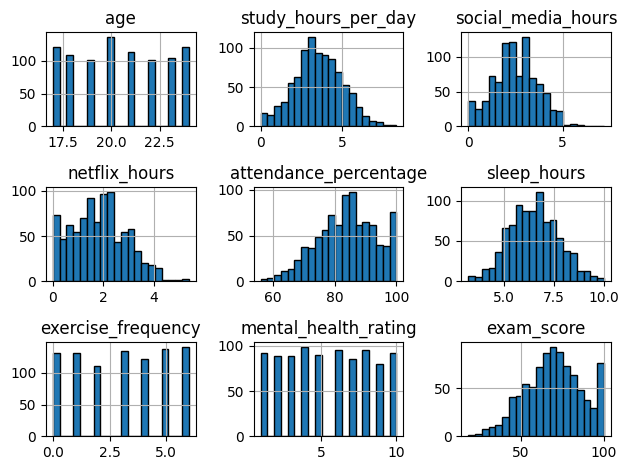

In [16]:
dataset.hist(bins=20, edgecolor="Black")
plt.tight_layout()
plt.show()

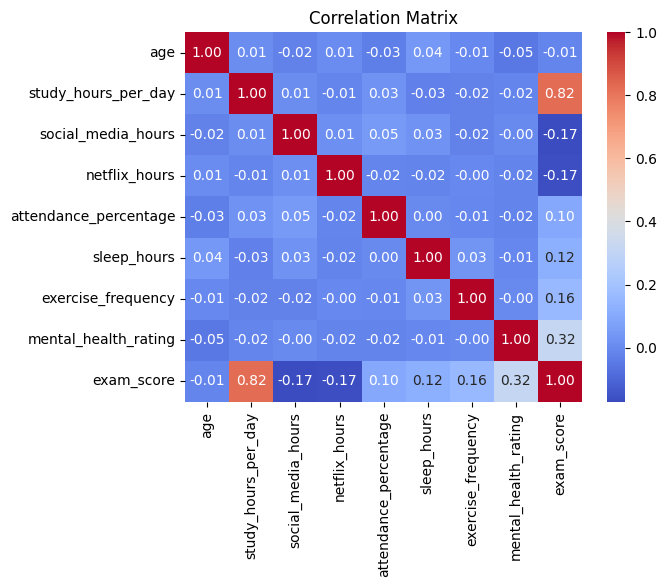

In [17]:
sns.heatmap(dataset.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt = ".2f")
plt.title("Correlation Matrix")
plt.show()

In [18]:
dataset.columns

Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

In [19]:
features = ['study_hours_per_day','attendance_percentage','mental_health_rating','sleep_hours']
target = 'exam_score'

In [20]:
df_model = dataset[features + [target]].copy()
df_model


,study_hours_per_day,attendance_percentage,mental_health_rating,sleep_hours,exam_score
0,0.0,85.0,8,8.0,56.2
1,6.9,97.3,8,4.6,100.0
2,1.4,94.8,1,8.0,34.3
3,1.0,71.0,1,9.2,26.8
4,5.0,90.9,1,4.9,66.4
...,...,...,...,...,...
995,2.6,77.0,6,7.5,76.1
996,2.9,86.0,6,6.8,65.9
997,3.0,61.9,9,6.5,64.4
998,5.4,100.0,1,7.6,69.7


In [21]:
x = df_model[features]
y = df_model[target]

Training and testing the  model

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
model = {
    "LinearRegression":{
        "model" : LinearRegression(),
        "params" : {}
    },
    "DecisionTreeRegressor":{
        "model": DecisionTreeRegressor(),
        "params":{"max_depth":[3,5,10], "min_samples_split":[2,5]}
    },
    "RandomForestRegressor":{
        "model": RandomForestRegressor(),
        "params": {"n_estimators":[50, 100], "max_depth":[5,10]}

    }
}

In [24]:
best_model=[]
for name, config in model.items():
    print(f"Training {name}")

    grid = GridSearchCV(config["model"], config["params"], cv=5, scoring="neg_mean_squared_error")
    grid.fit(x_train, y_train)

    y_pred = grid.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    best_model.append({
        "model":name,
        "best_params" : grid.best_params_,
        "rmse" : rmse,
        "r2" : r2


    })

Training LinearRegression
Training DecisionTreeRegressor
Training RandomForestRegressor


In [25]:
best_model

[{'model': 'LinearRegression',
  'best_params': {},
  'rmse': np.float64(7.189343492260101),
  'r2': 0.8095785999843577},
 {'model': 'DecisionTreeRegressor',
  'best_params': {'max_depth': 5, 'min_samples_split': 5},
  'rmse': np.float64(7.864496109618761),
  'r2': 0.7721342301418225},
 {'model': 'RandomForestRegressor',
  'best_params': {'max_depth': 10, 'n_estimators': 100},
  'rmse': np.float64(7.049192348699478),
  'r2': 0.8169304944580283}]

In [26]:
result_df = pd.DataFrame(best_model)
result_df

,model,best_params,rmse,r2
0,LinearRegression,{},7.189343,0.809579
1,DecisionTreeRegressor,"{'max_depth': 5, 'min_samples_split': 5}",7.864496,0.772134
2,RandomForestRegressor,"{'max_depth': 10, 'n_estimators': 100}",7.049192,0.816930


In [27]:
import joblib
best_row = result_df.sort_values(by="rmse").iloc[0]
best_row

model                           RandomForestRegressor
best_params    {'max_depth': 10, 'n_estimators': 100}
rmse                                         7.049192
r2                                            0.81693
Name: 2, dtype: object

In [28]:
best_model_name = best_row["model"]
best_model_name

'RandomForestRegressor'

In [29]:
best_model_config = model[best_model_name]
best_model_config

{'model': RandomForestRegressor(),
 'params': {'n_estimators': [50, 100], 'max_depth': [5, 10]}}

In [30]:
final_model = best_model_config["model"]
final_model.fit(x,y)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [31]:
joblib.dump(final_model,"best_model.pkl")

['best_model.pkl']

In [32]:
joblib.load("best_model.pkl").predict(x_test)

array([59.322, 45.997, 68.815, 75.565, 90.468, 59.723, 76.314, 90.965,
       73.457, 67.249, 58.411, 75.035, 56.229, 55.005, 76.049, 77.377,
       49.748, 94.233, 90.589, 69.017, 76.054, 98.647, 49.598, 72.848,
       84.897, 63.682, 99.473, 74.31 , 53.361, 96.629, 64.827, 82.692,
       55.219, 62.357, 67.927, 70.833, 96.158, 53.332, 66.46 , 85.642,
       61.923, 83.867, 67.564, 73.825, 84.69 , 75.743, 47.115, 98.023,
       73.371, 83.752, 59.576, 48.159, 59.03 , 76.919, 73.351, 98.959,
       72.794, 64.883, 81.661, 53.286, 82.962, 71.902, 57.787, 73.44 ,
       56.492, 80.567, 68.267, 63.711, 46.897, 67.112, 62.222, 59.675,
       52.985, 82.54 , 70.401, 59.634, 62.165, 99.731, 31.354, 78.749,
       82.97 , 84.456, 80.251, 63.666, 98.301, 98.213, 73.611, 64.646,
       61.383, 57.168, 97.818, 84.187, 84.065, 45.55 , 64.815, 59.378,
       86.858, 71.496, 93.114, 82.019, 41.023, 51.932, 72.564, 58.287,
       60.005, 71.476, 82.538, 78.339, 85.116, 70.085, 93.155, 66.448,
      